## 필요한 모듈 가져오기.

In [245]:
import tensorflow as tf

import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 필요한 모듈을 가져왔으니 데이터를 가져와서 이해해보자.

In [246]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [247]:
data.shape

(98401, 2)

In [248]:
data.sample(10)

,headlines,text
18516,Google launches new search engine for scientists,Google on Thursday launched a new search engin...
9621,Deepika and Ranveer arrive in Mumbai after get...,Deepika Padukone and Ranveer Singh arrived in ...
69073,2 asteroids orbiting each other get classified...,NASA's Hubble Space Telescope has photographed...
81470,"Shriram Group and IDFC in Ã¢ÂÂ¹64,600 crore m...",The board of directors of Shriram Capital and ...
72704,Foreign firms had access to unencrypted Aadhaa...,An RTI reply stated that UIDAI had signed cont...
1155,In-laws of woman who entered Sabarimala refuse...,"Kanakadurga, one of the two women who entered ..."
40499,1p drop in petrol price mistake by our staffer...,Pointing out that the price of petrol and dies...
11434,IIT-Madras researchers design India's 1st micr...,Indian Institute of Technology Madras research...
64609,Austrian police raid Lego store over Ninja wit...,Austrian police on Friday raided a Lego store ...
50549,GST on houses under Pradhan Mantri Awas Yojna ...,The government has cut GST rate from 12% to 8%...


## 가져온데이터는 총 98401*2개의 문장으로 컬럼은 요약문장이랑 그에따른 텍스트문장이있다.
## 이제 가져온 데이터를 전처리해보자.
## 일단 데이터의 중복데이터를 제외한 유니크한 데이터를 보자.

In [249]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


## 중복데이터를 제외한 데이터는 text는 98360개, headlines데이터는 98280개가있다.
## 이제 데이터의 Null값을 확인해보자.

In [250]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


## 다행이도 Null값은 없는걸로 확인된다.
## 이제 간단한 전처리는 끝났고 컴퓨터의 연산을 보다 더욱 쉽게 해주기위해, 정규화를 해보자.
## 정규화란 i am과 i'm은 똑같은 문장이므로 이걸 같은것으로 취급해 연산을 더욱 쉽게 해주도록 하는 작업이다.

In [251]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


## 이것은 정규화 하기위한 사전이다 출처는 https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python 이다.

## 정규화 준비는 끝났으므로 이제 용어가아닌 불용어를 확인해보자.

In [252]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

## 불용어 갯수는 179개있다. 이제 이 불용어를 제거해주자.

## 다음은 데이터 불용어를 제거해주기위한 함수이다. 이제 이 함수를 가지고 불용어를 제거해주자.

In [254]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

## 샘플데이터를 넣어봐서 이 함수가 제대로 작동되는지 확인해보자.

In [255]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_headline = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("headline:", preprocess_sentence(temp_headline, False))

text:  everything bought great infact ordered twice third ordered wasfor mother father
headline: great way to start the day


## 잘 제거된 모습이고, 여기서 중요한점은 headline의 불용어는 제거안해줘도 된다는 점이다. headline의 데이터 전처리는 나중에 따로 불러와서 해주도록하자.

In [256]:
clean_text = []

for s in data['text']:
    clean_text.append(preprocess_sentence(s))


print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

## headlines의 데이터는 불용어 처리는 안하고 쉼표나 느낌표, 물음표 등 이런것만 삭제해주는 과정을 진행했다.

In [257]:
clean_headlines = []

for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


## 이제 전처리를 해준 이 데이터를 보다 더 쉽게 확인해주기위해 다시 데이터프레임형식으로 만들어주자. 그리고 빈값은 null값으로 변환해주자.

In [258]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [259]:
data.head()

,headlines,text
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...


## 잘 변환해준 모습이고 이제 null값을 확인 후 삭제해주도록하자.

In [260]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

## 운좋게도 null값은 없는것같다. 이제 필요없는 불용어들을 다 삭제해주고 전처리 해줬으니 훈련의 사용할 데이터의 최대길이를 정해주자.
## 이 과정을 진행해주기 위하여 그림으로 길이 분포를 시각화해보자.

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09983638377659
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299651426306644


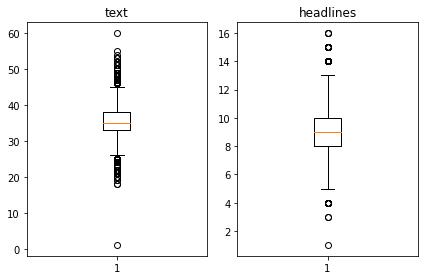

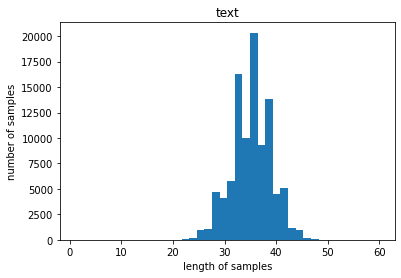

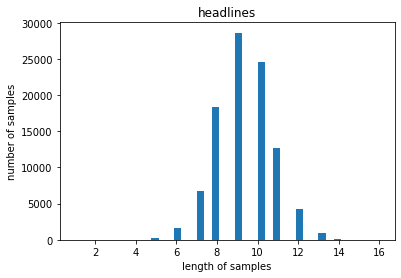

In [261]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## text의 평균길이는 35 headlines의 평균길이는9이다.
## 나는 데이터 전부 95%이상까지 쓰고싶어서 조금만 잘라주었다.

In [262]:
text_max_len = 41
headlines_max_len = 12

In [263]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [265]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 41 이하인 샘플의 비율: 0.9549293198239855
전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9880387394437048


## 이제 길이가 긴 데이터는 날려주도록하자.

In [266]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 92836


## 너무 긴 문장은 날려주었고, 이제 디코더에 들어갈 input,target 데이터를 나눠주고, 인코더에 들어갈 input데이터를 넣어주자.

In [267]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
6,india get all out for their lowest odi total i...,india recorded lowest odi total new zealand ge...,sostoken india get all out for their lowest od...,india get all out for their lowest odi total i...


## 이제 테스트와 트레인 데이터로 나누어주자.

In [268]:
encoder_input = np.array(data['text'])
decoder_input = np.array(data['decoder_input']) 
decoder_target = np.array(data['decoder_target']) 

In [269]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [270]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 18567


In [271]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 74269
훈련 레이블의 개수 : 74269
테스트 데이터의 개수 : 18567
테스트 레이블의 개수 : 18567


## 잘 나누어졌다. 이제 이 데이터를 가지고 정수형으로 인코딩해보도록하자.

In [272]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [273]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 66957
등장 빈도가 6번 이하인 희귀 단어의 수: 45578
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 21379
단어 집합에서 희귀 단어의 비율: 68.07055274280508
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.589360388643471


## 3.6%면 적은것같다. 그래서 나는 등장 빈도가 6번 이하인 희귀 단어의 수를 제외해주도록 할것이다.
## 어림잡아 20000으로 설정하자.

In [274]:
src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

In [275]:
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)


print(encoder_input_train[:3])

[[16092, 596, 8763, 15438, 41, 339, 642, 357, 3072, 2191, 102, 15438, 65, 139, 3719, 1683, 988, 32, 137, 68, 788, 1157, 3985, 139, 2741, 466, 15438, 1, 1178, 1697, 1085], [7791, 710, 1723, 13750, 4345, 65, 1723, 63, 824, 5261, 11695, 306, 4013, 298, 4013, 3400, 4345, 1723, 1217, 5467, 6919, 1615, 1209, 2285, 953, 9110, 149, 111, 1594], [8619, 1985, 92, 6655, 5981, 69, 1, 8764, 4915, 3643, 18686, 3528, 98, 177, 1109, 484, 373, 510, 84, 3401, 314, 4, 3643, 353, 1360, 3, 471, 772, 18, 7323, 1098, 70, 763, 18686, 537, 375, 303]]


## 잘 변환된거같고 이제 decoder에 들어갈 headline 데이터들도 정수형 인코딩을 해보자.

In [276]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [277]:
threshold = 7
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29212
등장 빈도가 6번 이하인 희귀 단어의 수: 20001
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9211
단어 집합에서 희귀 단어의 비율: 68.4684376283719
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.510978342831169


In [278]:
tar_vocab = 9000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [279]:
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 66, 3844, 4232, 6, 230, 326], [1, 4365, 268, 3094, 2294, 86, 80, 1199, 92, 366], [1, 2043, 19, 7, 6, 2459, 4, 225, 6258, 4366], [1, 3530, 2173, 117, 242, 4503, 105, 3, 1265, 1853, 118, 3, 2605], [1, 610, 963, 161, 7, 35, 6, 1746, 587, 498, 117]]
target
decoder  [[66, 3844, 4232, 6, 230, 326, 2], [4365, 268, 3094, 2294, 86, 80, 1199, 92, 366, 2], [2043, 19, 7, 6, 2459, 4, 225, 6258, 4366, 2], [3530, 2173, 117, 242, 4503, 105, 3, 1265, 1853, 118, 3, 2605, 2], [610, 963, 161, 7, 35, 6, 1746, 587, 498, 117, 2]]


## 이제 이 데이터들의 길이가 1인것과 0인것을 삭제해주도록하자.

In [280]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 74269
훈련 레이블의 개수 : 74269
테스트 데이터의 개수 : 18567
테스트 레이블의 개수 : 18567


## 그렇게 많지않아서 괜찮은 데이터인것같다. 이제 마지막으로 패딩을 시키자. 나는 패딩을 'pre' 로 써줘서 앞의데이터들을 덜 잊게해주었다.

In [281]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='pre')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='pre')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='pre')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='pre')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='pre')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='pre')


## 이제 데이터의 전처리는 끝난것같고, 이제 모델을 설계하자.
# 인코더 모델설계: 인코더에서 층은 3층만 쌓아줬다. 더 쌓아줘봤자 과적합만 일어날것같다.

In [282]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# 디코더 설계

In [283]:
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 디코더 출력층설계: 디코더의 출력층은 마지막 출력이므로 soft맥스로 항등함수로 내뱉어주므로 층을 깊게할 필요없다고 생각해 층수를 총 2개만 구현해주었다.

In [284]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 41)]         0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 41, 128)      2560000     ['input_26[0][0]']               
                                                                                                  
 lstm_20 (LSTM)                 [(None, 41, 256),    394240      ['embedding_10[0][0]']           
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                           

## 이제 어텐션 층을 만들어서 디코더의 출력층을 수정해도록하자.

In [285]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 41)]         0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 41, 128)      2560000     ['input_26[0][0]']               
                                                                                                  
 lstm_20 (LSTM)                 [(None, 41, 256),    394240      ['embedding_10[0][0]']           
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                           

## 이제 모델을 훈련시켜보자. early stopping을 통해 특정조건이되면 훈련을 멈추게 해주었다.

In [286]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=20)

Epoch 1/20
291/291 [==============================] - 25s 69ms/step - loss: 5.5010 - val_loss: 5.2680
Epoch 2/20
291/291 [==============================] - 19s 65ms/step - loss: 5.1648 - val_loss: 5.0541
Epoch 3/20
291/291 [==============================] - 19s 64ms/step - loss: 5.0471 - val_loss: 4.9425
Epoch 4/20
291/291 [==============================] - 19s 64ms/step - loss: 4.9069 - val_loss: 4.7970
Epoch 5/20
291/291 [==============================] - 19s 65ms/step - loss: 4.6816 - val_loss: 4.5904
Epoch 6/20
291/291 [==============================] - 19s 65ms/step - loss: 4.4329 - val_loss: 4.3621
Epoch 7/20
291/291 [==============================] - 19s 64ms/step - loss: 4.2235 - val_loss: 4.2226
Epoch 8/20
291/291 [==============================] - 19s 65ms/step - loss: 4.0500 - val_loss: 4.0948
Epoch 9/20
291/291 [==============================] - 19s 64ms/step - loss: 3.8901 - val_loss: 4.3862
Epoch 10/20
291/291 [==============================] - 19s 64ms/step - loss: 3.751

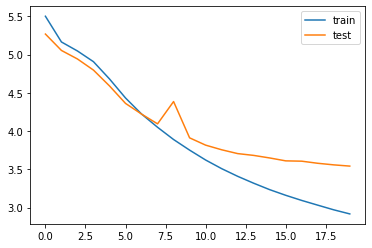

In [287]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 이제 테스트 결과를 눈으로 보자 그러기위해선 인퍼러스 모델을 구현해줘야한다.

In [288]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word

In [289]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


In [290]:
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [294]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence


In [295]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp



In [293]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : apple co founder steve wozniak interview tuesday said believe self driving cars adding really believe quite possible yet said kept upgrading tesla car gave idea autonomous driving said really going happen added 
실제 요약 : do not believe in self driving cars apple co founder wozniak 
예측 요약 :  apple is driving cars is the cars is driving ceo musk


원문 : two women constables sunday helped year old woman give birth twins onboard visakhapatnam express station mumbai constables attended woman receiving information labour pain travelling family woman infants taken hospital treatment care 
실제 요약 : cops help woman deliver twins onboard train in mumbai 
예측 요약 :  woman gives birth to save woman from her birth in mumbai


원문 : floating mcdonald restaurant located west coast canada built showcase future architecture technology world fair expo named restaurant constructed estimated cost crore left abandoned years however plans eatery announced 
실제 요약 : floating mcdonald in canada has been abandon

## 나쁘지않은것같다. 실제 요약에 나오는 단어들이 예측요약에 나오는걸로봐선 그래도 꽤 괜찮은 모델인것같다. 하지만 추상적이라 그런지 그렇게 정확하진않아보인다.
## 이제 추상적인모델말고 추출적모델을 써보자. 추출적 모델은 추상적 모델링보다 구현하기 훨씬쉽다. 일단summa를 임포트해오자.

In [317]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [318]:
import requests
from summa.summarizer import summarize

In [319]:
text_str = data['text'][200]
print(summarize(text_str, ratio=0.5))

Australia's wicketkeeper-batswoman Alyssa Healy has said that the Australian team needs to be wary of India's women's T20I team captain Harmanpreet Kaur at the ICC Women's T20 World Cup next year.


In [324]:
text_str = data['text'][100]
print(summarize(text_str, ratio=0.6))

German multinational engineering and electronics firm Bosch has made its first investment in India in Bengaluru-based deep-tech startup SimYog. SimYog has raised about Ã¢ÂÂ¹6.3 crore in the funding round, with participation from early-stage venture capital firm Ideaspring Capital.


In [323]:
text_str = data['text'][50]
print(summarize(text_str, ratio=0.5))

Former Finance Minister Yashwant Sinha on Tuesday demanded a probe into the alleged diversion of loans worth Ã¢ÂÂ¹31,000 crore by Dewan Housing Finance (DHFL).


## 나는 추출적요약이 더 맘에든다. 표현이 좀 풍부하지않지만 그래도 요약은 정확한 사실을 가져와야하므로 추출적요약이 더 낫지않나 생각이든다. 그리고 추상적요약보다 간편한게 가장 큰 장점인것같다
## 이것으로 Explolation07을 마친다.